In [1]:
import pandas as pd

df = pd.read_csv("data/Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
## Step 3: Initial Data Understanding

The dataset contains 7043 customer records with 21 columns. The target variable is Churn, indicating whether a customer left the service. The data includes a mix of numerical and categorical features representing customer demographics, service usage, and billing details. The churn distribution shows more non-churned customers than churned customers, which reflects real-world business scenarios.


In [4]:
df.drop("customerID", axis=1, inplace=True)


In [5]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [6]:
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
## Step 4: Data Cleaning

The customerID column was removed as it does not contribute to prediction. The TotalCharges column was converted from object to numeric format, and missing values were handled appropriately. After cleaning, the dataset contains no missing values and is ready for further analysis.


In [10]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn"].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [11]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [12]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [13]:
df_encoded.shape
df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
## Step 5: Feature Encoding

The target variable Churn was converted into a binary numeric format. All categorical features were transformed using one-hot encoding to make the dataset compatible with machine learning algorithms.


In [14]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [16]:
X_train.shape, X_test.shape


((5634, 30), (1409, 30))

In [ ]:
## Step 6: Train-Test Split

The dataset was split into training and testing sets to evaluate model performance on unseen data. Stratified sampling was used to preserve the original churn distribution.


In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=3000,
    solver="lbfgs"
)

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [19]:
y_pred = log_reg.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8062455642299503

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [21]:
confusion_matrix(y_test, y_pred)


array([[927, 108],
       [165, 209]], dtype=int64)

In [ ]:
## Step 7: Baseline Model – Logistic Regression

A Logistic Regression model was trained as a baseline classifier to predict customer churn. The model was evaluated using accuracy, precision, recall, and F1-score on the test dataset.


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [23]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7877927608232789

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
# Step 9:- Tuned Random Forest (Industry-Style)

In [24]:
rf_tuned = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42
)

rf_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [25]:
y_pred_rf_tuned = rf_tuned.predict(X_test)

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_tuned))


Tuned RF Accuracy: 0.765791341376863

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1035
           1       0.54      0.74      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



In [26]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_tuned.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
1,tenure,0.176167
3,TotalCharges,0.142546
25,Contract_Two year,0.102075
2,MonthlyCharges,0.100447
10,InternetService_Fiber optic,0.072511
28,PaymentMethod_Electronic check,0.055134
24,Contract_One year,0.040672
13,OnlineSecurity_Yes,0.035253
19,TechSupport_Yes,0.025399
18,TechSupport_No internet service,0.019365


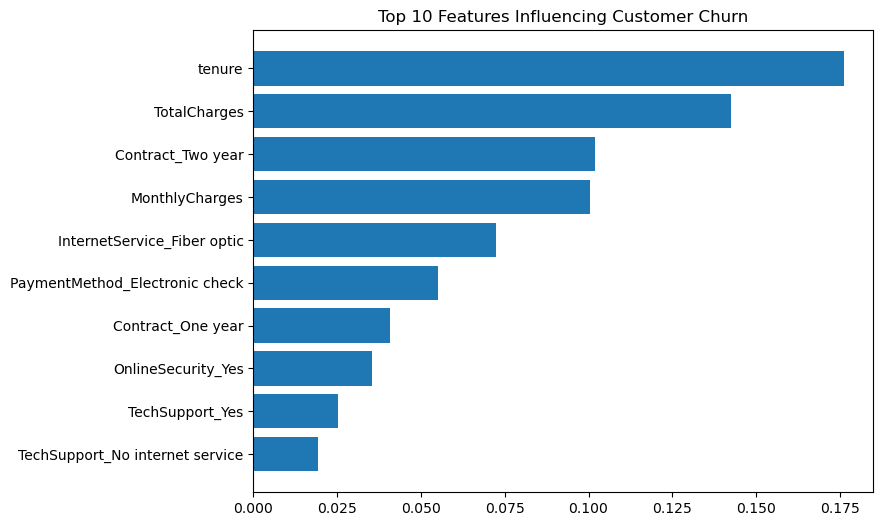

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(
    feature_importance["Feature"][:10],
    feature_importance["Importance"][:10]
)
plt.gca().invert_yaxis()
plt.title("Top 10 Features Influencing Customer Churn")
plt.show()


In [ ]:
#Step 10: Feature Importance Analysis

Feature importance analysis was performed using the tuned Random Forest model to identify key factors influencing customer churn. This step provides interpretability and helps businesses understand which services or customer behaviors contribute most to churn.

In [ ]:
## Step 11: Business Insights & Recommendations

Based on feature importance analysis, customers with month-to-month contracts, shorter tenure, higher monthly charges, and limited access to tech support are more likely to churn. Recommended actions include offering loyalty programs, improving support services, and promoting long-term contracts to retain high-risk customers.


In [ ]:
## Step 12: Model Deployment Concept

The trained model can be integrated with business systems to predict churn for new customers. High-risk customers can be automatically flagged, allowing marketing and support teams to proactively implement retention strategies.


In [ ]:
## Step 13: Project Summary

This project demonstrates an end-to-end approach to predicting customer churn using a real-world telecom dataset. Data preprocessing, baseline and tuned models, evaluation, feature importance analysis, and actionable business insights were performed. The tuned Random Forest model was selected as the final model due to its strong ability to identify at-risk customers and provide interpretable results for decision-making.


In [30]:
train_cols = X_train.columns


In [31]:
import pandas as pd

# Example: new customer dictionary (can include only relevant keys)
new_customer = {
    'SeniorCitizen': 0,
    'tenure': 5,
    'MonthlyCharges': 70.5,
    'TotalCharges': 350.0,
    'gender_Male': 1,
    'Partner_Yes': 0,
    # ... include any keys you want
}

# Convert to DataFrame
new_df = pd.DataFrame([new_customer])


In [32]:
for col in train_cols:
    if col not in new_df.columns:
        new_df[col] = 0  # set default to 0


In [33]:
new_df = new_df[train_cols]


In [34]:
prediction = rf_tuned.predict(new_df)
prob = rf_tuned.predict_proba(new_df)[0][1]

if prediction[0] == 1:
    print("Prediction: Churn")
else:
    print("Prediction: No Churn")

print(f"Churn probability: {prob:.2f}")


Prediction: No Churn
Churn probability: 0.49
